In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
sp500 = pd.read_csv("S&P 500 Post-Processing.csv")

# Some Data Understanding

In [10]:
sp500

,Symbol,Name,Sector,Price/Earnings,Earnings/Share,profitMargin,debtToEquityRatio,returnOnAssets,quickRatio
0,MMM,3M Company,Industrials,24.31,7.92,-0.214039,9.509465,-0.144175,0.701837
1,AOS,A.O. Smith Corp,Industrials,27.76,1.70,0.144466,0.742518,0.170053,1.014916
2,ABT,Abbott Laboratories,Health Care,22.51,0.26,0.142686,0.890786,0.077520,1.000217
3,ABBV,AbbVie Inc.,Health Care,19.41,3.29,0.089528,11.999421,0.035559,0.633466
4,ACN,Accenture plc,Information Technology,25.47,5.44,0.107181,0.964732,0.139512,1.096134
...,...,...,...,...,...,...,...,...,...
374,XRX,Xerox Corp.,Information Technology,8.87,0.59,0.000145,2.629360,0.000093,0.467794
375,XYL,Xylem Inc.,Industrials,30.94,1.83,0.082700,0.583907,0.050615,1.195465
376,YUM,Yum! Brands Inc,Consumer Discretionary,27.25,4.07,0.225692,-1.792950,0.264470,0.978074
377,ZBH,Zimmer Biomet Holdings,Health Care,14.32,9.01,0.138487,0.721830,0.048117,0.650311


In [11]:
sp500.describe()

,Price/Earnings,Earnings/Share,profitMargin,debtToEquityRatio,returnOnAssets,quickRatio
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,25.585805,3.815858,0.119022,2.493576,0.072116,0.955769
std,44.421724,5.078349,0.148888,12.391308,0.076473,1.001040
min,-251.530000,-19.940000,-0.888772,-60.056635,-0.188081,0.003442
25%,15.915000,1.530000,0.055714,0.839101,0.029131,0.404032
50%,20.180000,2.890000,0.113247,1.575441,0.059839,0.736892
75%,25.940000,5.120000,0.183070,2.926054,0.110069,1.084663
max,520.150000,44.090000,0.871678,123.791240,0.556730,11.712097


In [12]:
sp500.isna().sum()

Symbol               0
Name                 0
Sector               0
Price/Earnings       0
Earnings/Share       0
profitMargin         0
debtToEquityRatio    0
returnOnAssets       0
quickRatio           0
dtype: int64

In [13]:
sp500.duplicated().sum()

0

Creating a heatmap to see any correlation we can find of rip

<AxesSubplot:>

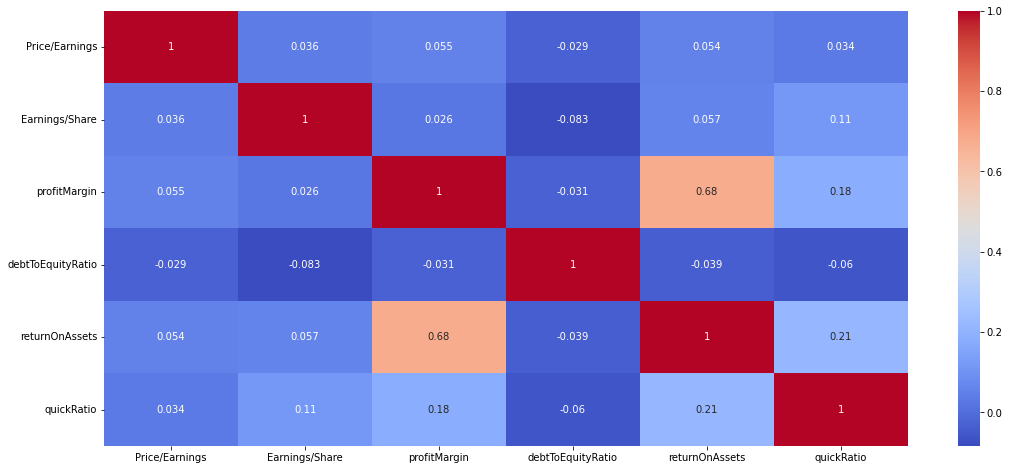

In [14]:
corr = sp500.corr()
plt.figure(figsize = (18,8))
sns.heatmap(corr, annot = True, cmap='coolwarm')

# Cosine Similarity

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
dataForCosineSimilarites = sp500.drop(columns=["Symbol", "Name", "Sector"])

In [17]:
cos_sim = cosine_similarity(dataForCosineSimilarites, dataForCosineSimilarites)
cos_sim

array([[1.        , 0.91611161, 0.90736226, ..., 0.89951487, 0.92278336,
        0.92246424],
       [0.91611161, 1.        , 0.99865505, ..., 0.99201968, 0.87756625,
        0.99934014],
       [0.90736226, 0.99865505, 1.        , ..., 0.98520259, 0.85298221,
        0.99906275],
       ...,
       [0.89951487, 0.99201968, 0.98520259, ..., 1.        , 0.91035662,
        0.98768767],
       [0.92278336, 0.87756625, 0.85298221, ..., 0.91035662, 1.        ,
        0.87248004],
       [0.92246424, 0.99934014, 0.99906275, ..., 0.98768767, 0.87248004,
        1.        ]])

In the follow section I will implement the function from the professor the sort through the cosine similarites

In [18]:
results = {}

for idx, row in sp500.iterrows():
    # print(cos_sim[idx].argsort()[:-100:-1])
    #This line of code is using .argsort() to get all the indecies of the similar stocks with the cosinesimlarities in acending order then we take the top 100 in descending order
    similar_indices = cos_sim[idx].argsort()[:-100:-1] 
    
    # print(df_genres['anime_id'].iloc[[0]].tolist())
    # print(df_genres['anime_id'].iloc[[5803]]) # I was using this to figure out what each individual piece of this chain is doing
    similar_items = [(cos_sim[idx][i], sp500['Symbol'].iloc[[i]].tolist()[0]) #Okay so I realized for the second element we use this chain ".iloc[[i]].tolist()[0]" to just pull only an int insted of a dataframe or list
                     for i in similar_indices]     
    
    # print(cos_sim[idx]) # I guess the point of this is to get the current company, then get the cosine similarity for the enxt closes company which is I from the similar_indices

    results[row['Symbol']] = similar_items[1:]
    
    

In [19]:
def get_CompName(symbol):
    return sp500[sp500["Symbol"] == symbol]["Name"].tolist()[0].split(' - ')[0] 
    

# Time to make reccomendations!!! :)

In [20]:
def recommend_Stock(ticker: str, n_Recommendations:int):
    """ 
    Takes in Ticker Symbol and then returns a list of N Recommendations of the stocks most similar to it sorted most similar to least. 
    
    """
    print(f"Reccomendation for companies similar to {get_CompName(ticker)}")
    print("-----------")
    
    recs = results[ticker][:n_Recommendations]
    recsSymbols = [rec[1] for rec in recs]
    recsSymbols.append(ticker)
    dataFrameofRec = sp500[sp500["Symbol"].isin(recsSymbols)]
    dataFrameofRec = dataFrameofRec.set_index("Symbol") 
    dataFrameofRec.loc[[ticker],["CosineScore"]] = 1
   
    for rec in recs:
        print(f"\tRecommended with a score {rec[0]}:\t{rec[1]}: {get_CompName(rec[1])}")
        dataFrameofRec.loc[[rec[1]],["CosineScore"]] = rec[0]
   
    return dataFrameofRec.sort_values(by="CosineScore", ascending= False).reset_index()



In [21]:
stockRec = recommend_Stock(ticker="MSFT", n_Recommendations=5)
stockRec

Reccomendation for companies similar to Microsoft Corp.
-----------
	Recommended with a score 0.9999255509653278:	RHI: Robert Half International
	Recommended with a score 0.9997236386170899:	FTV: Fortive Corp
	Recommended with a score 0.9996937923957704:	ADI: Analog Devices, Inc.
	Recommended with a score 0.9996623434459944:	SYK: Stryker Corp.
	Recommended with a score 0.9996492943276161:	EXPD: Expeditors International


,Symbol,Name,Sector,Price/Earnings,Earnings/Share,profitMargin,debtToEquityRatio,returnOnAssets,quickRatio,CosineScore
0,MSFT,Microsoft Corp.,Information Technology,25.76,2.97,0.341462,0.997721,0.186302,1.535723,1.000000
1,RHI,Robert Half International,Industrials,20.18,2.32,0.064317,0.895544,0.137616,1.289448,0.999926
2,FTV,Fortive Corp,Industrials,25.05,2.46,0.142746,0.638295,0.052789,1.590800,0.999724
3,ADI,"Analog Devices, Inc.",Information Technology,17.67,2.11,0.269357,0.371976,0.066896,0.758456,0.999694
4,SYK,Stryker Corp.,Health Care,23.46,2.68,0.154405,1.146614,0.082426,0.860750,0.999662
5,EXPD,Expeditors International,Industrials,25.26,2.36,0.080954,0.892085,0.148876,1.786823,0.999649


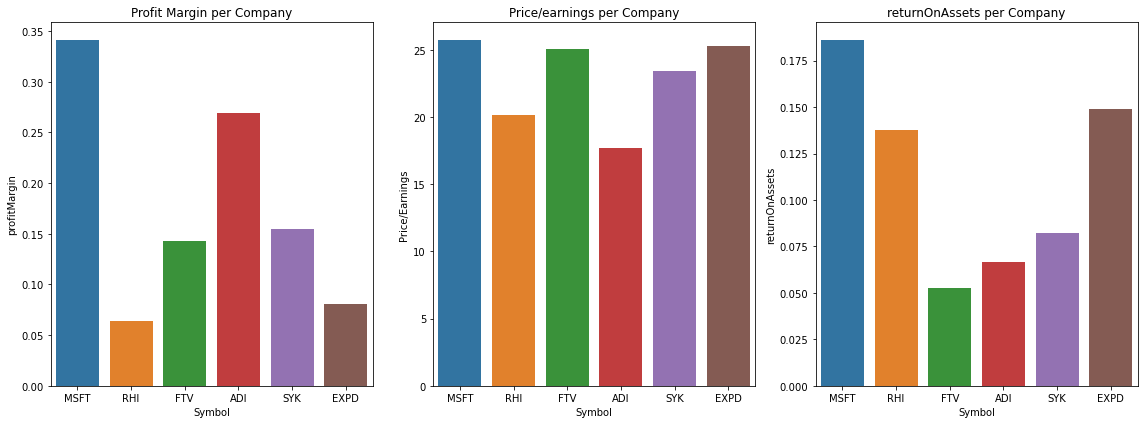

In [23]:
#This line is where we create the plot where we will add all our plots :)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))  # Adjust figsize as needed

sns.barplot(data = stockRec, x = "Symbol", y = "profitMargin", ax=axes[0])
axes[0].set_title('Profit Margin per Company')

sns.barplot(data = stockRec, x = "Symbol", y = "Price/Earnings", ax=axes[1])
axes[1].set_title('Price/earnings per Company')

sns.barplot(data = stockRec, x = "Symbol", y = "returnOnAssets", ax=axes[2])
axes[2].set_title('returnOnAssets per Company')

plt.tight_layout()
plt.show()


# Standardization data to see if there is a difference 

In [27]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import Normalizer

array([[ 1.        , -0.86625435, -0.43553795, ..., -0.89785445,
         0.32866164, -0.90940192],
       [-0.86625435,  1.        ,  0.42339949, ...,  0.93551248,
        -0.51569723,  0.76524452],
       [-0.43553795,  0.42339949,  1.        , ...,  0.15398707,
        -0.81419152,  0.43133957],
       ...,
       [-0.89785445,  0.93551248,  0.15398707, ...,  1.        ,
        -0.20015395,  0.76701504],
       [ 0.32866164, -0.51569723, -0.81419152, ..., -0.20015395,
         1.        , -0.44949798],
       [-0.90940192,  0.76524452,  0.43133957, ...,  0.76701504,
        -0.44949798,  1.        ]])

I Imported all the preprocessing steps just in case, but for now we will focus on the affects of standardization

In [30]:
standardScaler  = StandardScaler()
dataForCosineSimilaritesNormalized = standardScaler.fit_transform(dataForCosineSimilarites)

#Running the cosineSimilarities again
cos_sim = cosine_similarity(dataForCosineSimilaritesNormalized, dataForCosineSimilaritesNormalized)

array([[ 1.        , -0.86625435, -0.43553795, ..., -0.89785445,
         0.32866164, -0.90940192],
       [-0.86625435,  1.        ,  0.42339949, ...,  0.93551248,
        -0.51569723,  0.76524452],
       [-0.43553795,  0.42339949,  1.        , ...,  0.15398707,
        -0.81419152,  0.43133957],
       ...,
       [-0.89785445,  0.93551248,  0.15398707, ...,  1.        ,
        -0.20015395,  0.76701504],
       [ 0.32866164, -0.51569723, -0.81419152, ..., -0.20015395,
         1.        , -0.44949798],
       [-0.90940192,  0.76524452,  0.43133957, ...,  0.76701504,
        -0.44949798,  1.        ]])

In [31]:
#Now we re-do our recommender system
results = {}

for idx, row in sp500.iterrows():
    # print(cos_sim[idx].argsort()[:-100:-1])
    #This line of code is using .argsort() to get all the indecies of the similar stocks with the cosinesimlarities in acending order then we take the top 100 in descending order
    similar_indices = cos_sim[idx].argsort()[:-100:-1] 
    
    # print(df_genres['anime_id'].iloc[[0]].tolist())
    # print(df_genres['anime_id'].iloc[[5803]]) # I was using this to figure out what each individual piece of this chain is doing
    similar_items = [(cos_sim[idx][i], sp500['Symbol'].iloc[[i]].tolist()[0]) #Okay so I realized for the second element we use this chain ".iloc[[i]].tolist()[0]" to just pull only an int insted of a dataframe or list
                     for i in similar_indices]     
    
    # print(cos_sim[idx]) # I guess the point of this is to get the current company, then get the cosine similarity for the enxt closes company which is I from the similar_indices

    results[row['Symbol']] = similar_items[1:]

In [32]:
stockRec = recommend_Stock(ticker="MSFT", n_Recommendations=5)
stockRec

Reccomendation for companies similar to Microsoft Corp.
-----------
	Recommended with a score 0.9796429295364065:	EMR: Emerson Electric Company
	Recommended with a score 0.9597499945223791:	ZTS: Zoetis
	Recommended with a score 0.9583893530162866:	AVGO: Broadcom
	Recommended with a score 0.9555210172014118:	RMD: ResMed
	Recommended with a score 0.9380368100206088:	MA: Mastercard Inc.


,Symbol,Name,Sector,Price/Earnings,Earnings/Share,profitMargin,debtToEquityRatio,returnOnAssets,quickRatio,CosineScore
0,MSFT,Microsoft Corp.,Information Technology,25.76,2.97,0.341462,0.997721,0.186302,1.535723,1.000000
1,EMR,Emerson Electric Company,Industrials,25.74,2.35,0.871678,0.780511,0.337142,2.100358,0.979643
2,ZTS,Zoetis,Health Care,32.80,1.65,0.274345,1.860116,0.160487,1.769719,0.959750
3,AVGO,Broadcom,Information Technology,15.94,4.01,0.393143,2.037394,0.192759,2.342066,0.958389
4,RMD,ResMed,Health Care,31.54,2.41,0.212540,0.634835,0.151517,1.229742,0.955521
5,MA,Mastercard Inc.,Information Technology,34.99,3.65,0.446051,5.116323,0.275834,0.814068,0.938037


This is intresting, we actually do get diffent results, lets visualize the ratios to see how similar they really are

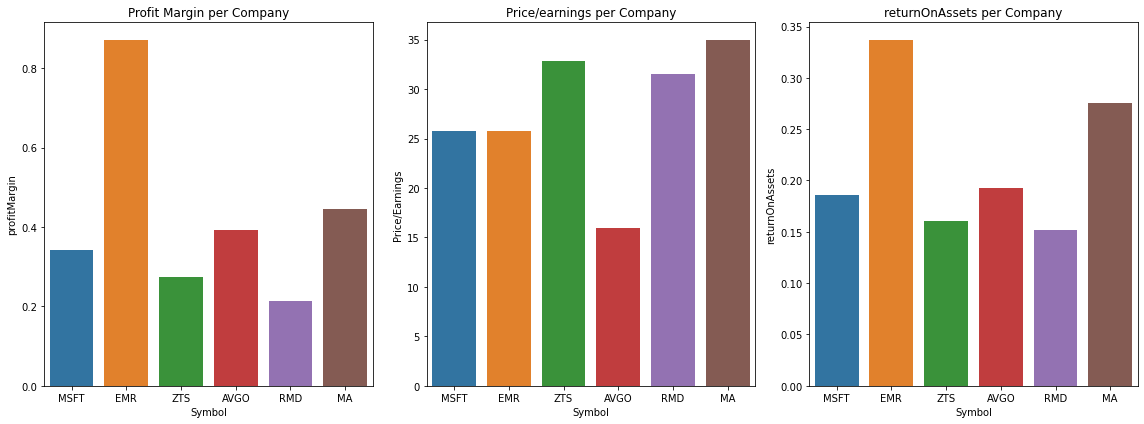

In [33]:
#This line is where we create the plot where we will add all our plots :)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))  # Adjust figsize as needed

sns.barplot(data = stockRec, x = "Symbol", y = "profitMargin", ax=axes[0])
axes[0].set_title('Profit Margin per Company')

sns.barplot(data = stockRec, x = "Symbol", y = "Price/Earnings", ax=axes[1])
axes[1].set_title('Price/earnings per Company')

sns.barplot(data = stockRec, x = "Symbol", y = "returnOnAssets", ax=axes[2])
axes[2].set_title('returnOnAssets per Company')

plt.tight_layout()
plt.show()

I would sat most are similar to microsoft with `EMR` being a little bit of an outlier. Otherwise the rest fo have similar ratios 